In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 7.4 MB/s eta 0:00:00


Fan Speed (0..10)       = 6.722222222222221
Cooling Level (0..10)   = 7.193693693693694


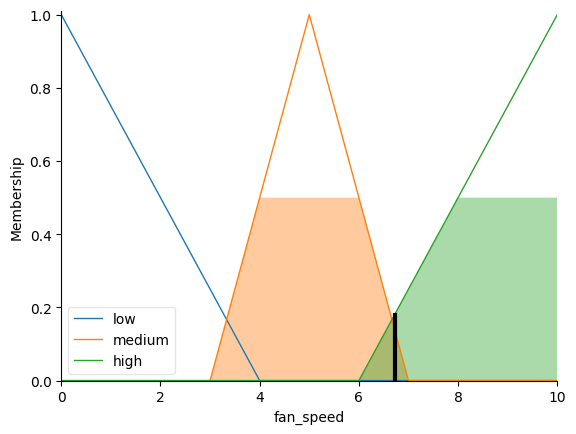

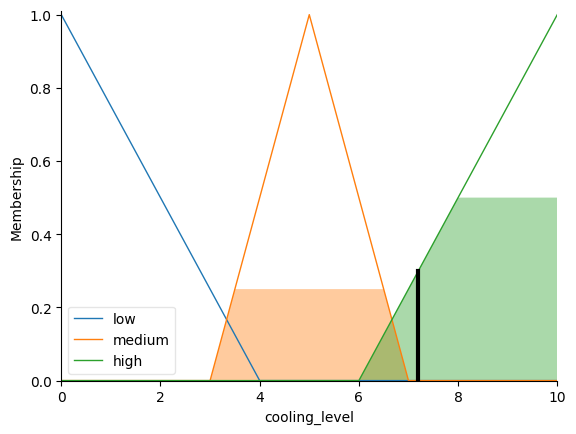

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
people = ctrl.Antecedent(np.arange(0, 21, 1), 'people')

fan_speed = ctrl.Consequent(np.arange(0, 11, 1), 'fan_speed')
cooling_level = ctrl.Consequent(np.arange(0, 11, 1), 'cooling_level')

temperature['cold']        = fuzz.trapmf(temperature.universe, [0, 0, 10, 15])
temperature['cool']        = fuzz.trimf(temperature.universe, [10, 15, 20])
temperature['comfortable'] = fuzz.trimf(temperature.universe, [18, 22, 26])
temperature['warm']        = fuzz.trimf(temperature.universe, [24, 28, 32])
temperature['hot']         = fuzz.trapmf(temperature.universe, [30, 35, 40, 40])

humidity['low']    = fuzz.trapmf(humidity.universe, [0, 0, 30, 45])
humidity['medium'] = fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['high']   = fuzz.trapmf(humidity.universe, [60, 75, 100, 100])

people['few']       = fuzz.trapmf(people.universe, [0, 0, 3, 6])
people['moderate']  = fuzz.trimf(people.universe, [4, 8, 12])
people['many']      = fuzz.trapmf(people.universe, [10, 14, 20, 20])

fan_speed['low']    = fuzz.trimf(fan_speed.universe, [0, 0, 4])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [3, 5, 7])
fan_speed['high']   = fuzz.trimf(fan_speed.universe, [6, 10, 10])

cooling_level['low']    = fuzz.trimf(cooling_level.universe, [0, 0, 4])
cooling_level['medium'] = fuzz.trimf(cooling_level.universe, [3, 5, 7])
cooling_level['high']   = fuzz.trimf(cooling_level.universe, [6, 10, 10])

rule1 = ctrl.Rule(temperature['cold'], fan_speed['low'])
rule2 = ctrl.Rule(temperature['cool'], fan_speed['low'])
rule3 = ctrl.Rule(temperature['comfortable'], fan_speed['medium'])
rule4 = ctrl.Rule(temperature['warm'], fan_speed['high'])
rule5 = ctrl.Rule(temperature['hot'], fan_speed['high'])

rule6  = ctrl.Rule(temperature['cold'], cooling_level['low'])
rule7  = ctrl.Rule(temperature['cool'], cooling_level['low'])
rule8  = ctrl.Rule(temperature['comfortable'], cooling_level['medium'])
rule9  = ctrl.Rule(temperature['warm'], cooling_level['high'])
rule10 = ctrl.Rule(temperature['hot'], cooling_level['high'])

rule11 = ctrl.Rule(humidity['low'], cooling_level['low'])
rule12 = ctrl.Rule(humidity['medium'], cooling_level['medium'])
rule13 = ctrl.Rule(humidity['high'], cooling_level['high'])
rule14 = ctrl.Rule(people['few'], fan_speed['low'])
rule15 = ctrl.Rule(people['moderate'], fan_speed['medium'])
rule16 = ctrl.Rule(people['many'], fan_speed['high'])

rule17 = ctrl.Rule(temperature['hot'] & humidity['high'] & people['many'],
                   (cooling_level['high'], fan_speed['high']))

all_rules = [rule1, rule2, rule3, rule4, rule5,
             rule6, rule7, rule8, rule9, rule10,
             rule11, rule12, rule13,
             rule14, rule15, rule16,
             rule17]

ac_ctrl = ctrl.ControlSystem(all_rules)
ac_sim  = ctrl.ControlSystemSimulation(ac_ctrl)

ac_sim.input['temperature'] = 30
ac_sim.input['humidity']    = 65
ac_sim.input['people']      = 10

ac_sim.compute()

print("Fan Speed (0..10)       =", ac_sim.output['fan_speed'])
print("Cooling Level (0..10)   =", ac_sim.output['cooling_level'])

fan_speed.view(sim=ac_sim)
cooling_level.view(sim=ac_sim)
